# Analiza danych pogodowych

W tym notebooku analizujemy dane pogodowe z biblioteki Meteostat.

In [3]:
# Importy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from meteostat import Point, Daily
import folium

# Konfiguracja wykresu
plt.style.use('ggplot')
sns.set(style="darkgrid")
%matplotlib inline

## Pobranie danych pogodowych dla Warszawy

In [4]:
# Ustawienie punktu (Warszawa)
warsaw = Point(52.2297, 21.0122)

# Ustawienie zakresu czasu (ostatni rok)
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)

# Pobranie danych
data = Daily(warsaw, start, end)
data = data.fetch()

# Wyświetlenie pierwszych wierszy
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-01-01,2.8,1.6,4.4,12.5,NaN,219.0,7.9,25.9,1006.7,NaN
2024-01-02,4.5,3.6,5.9,1.1,NaN,211.0,9.0,27.8,1005.9,NaN
2024-01-03,5.4,3.2,8.6,10.4,NaN,179.0,9.8,27.8,993.9,NaN
2024-01-04,5.9,-1.5,8.1,13.5,NaN,244.0,11.9,40.8,993.7,NaN
2024-01-05,-1.8,-2.5,4.6,2.8,NaN,274.0,13.7,40.8,1009.8,NaN


## Analiza temperatur

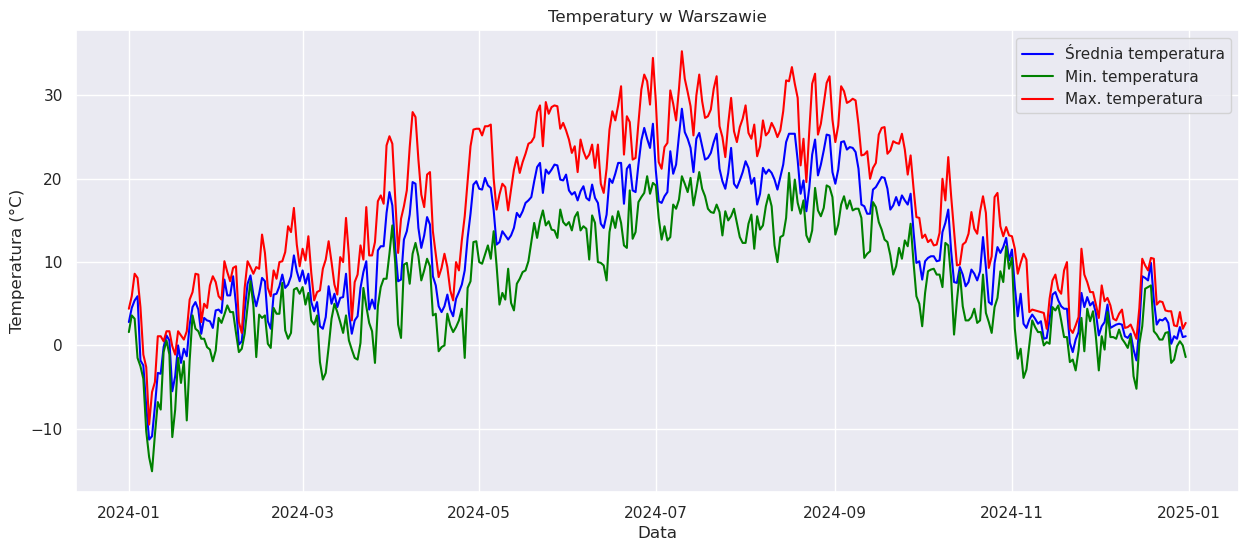

In [5]:
# Wykres temperatury
plt.figure(figsize=(15, 6))
plt.plot(data.index, data['tavg'], label='Średnia temperatura', color='blue')
plt.plot(data.index, data['tmin'], label='Min. temperatura', color='green')
plt.plot(data.index, data['tmax'], label='Max. temperatura', color='red')
plt.title('Temperatury w Warszawie')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Analiza opadów

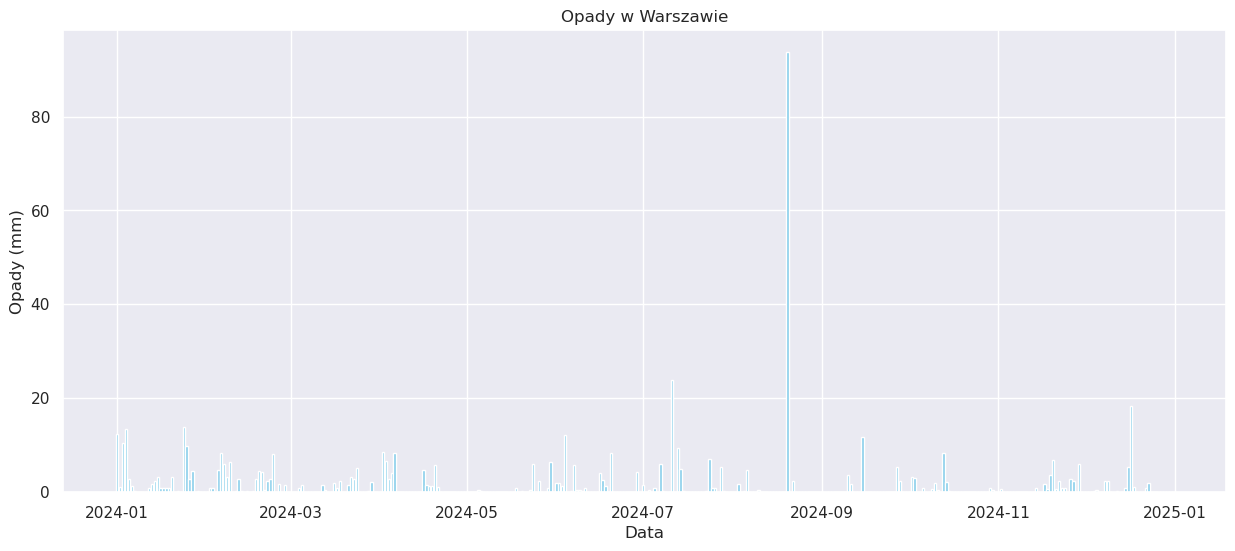

In [6]:
# Wykres opadów
plt.figure(figsize=(15, 6))
plt.bar(data.index, data['prcp'], color='skyblue')
plt.title('Opady w Warszawie')
plt.xlabel('Data')
plt.ylabel('Opady (mm)')
plt.grid(True)
plt.show()

## Mapa z lokalizacją

In [9]:
# Tworzenie mapy
m = folium.Map(location=[52.2297, 21.0122], zoom_start=10)
folium.Marker(
    location=[52.2297, 21.0122],
    popup='Warszawa',
    icon=folium.Icon(color='blue')
).add_to(m)
